Please visit the link attached and try to code step by step as mentioned. Create your own notebook/py script and upload.

https://www.learndatasci.com/tutorials/ultimate-guide-web-scraping-w-python-requests-and-beautifulsoup/

In [ ]:
from bs4 import BeautifulSoup     #parsing html
import requests                   #making web requests

#### Requesting web pages

In [ ]:
page=requests.get('https://www.allsides.com/media-bias/ratings')

In [ ]:
page

<Response [200]>

#### Saving html as a file

In [ ]:
def save_html(html,path):
    with open(path,'wb') as f:
        f.write(html)
save_html(page.content,'allsides')

#### Opening the saved file

In [ ]:
def open_html(path):
    with open(path,'rb') as f:
        return f.read()
html1=open_html('allsides')

#### Parsing HTML

In [ ]:
soup=BeautifulSoup(page.content,'html.parser')

In [ ]:
soup

<!DOCTYPE html>

<html dir="ltr" lang="en" prefix="og: http://ogp.me/ns# content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
<head profile="http://www.w3.org/1999/xhtml/vocab">
<meta charset="utf-8"/>
<link href="https://www.allsides.com/sites/default/files/AllSides-Icon.png" rel="shortcut icon" type="image/png"/>
<meta content="555035668344688" property="fb:app_id"/>
<meta content="What’s the bias of your favorite media outlet? See over 800 AllSides media bias ratings." name="description"/>
<meta content="media bias ratings chart, media bias ratings allsides, news media bias ratings, media outlet bias ratings, media bias ratings website" name="keywords"/>
<link href="https://www.allsides.com/media-bias/ratings" rel="canonical"/>
<link

#### Selecting data of the table

In [ ]:
rows=soup.select('tbody tr')

#### Selecting data of only one row

#### News Source

In [ ]:
row1=rows[0]
src_name=row1.select_one('.source-title')
src_name.text.strip()

'ABC News (Online)'

In [ ]:
src_link=row1.select_one('.source-title a')['href']    #since its a link in the page we consider the url of the news source
src_link

'/news-source/abc-news-media-bias'

In [ ]:
news_source='https://allsides.com'+src_link
news_source

'https://allsides.com/news-source/abc-news-media-bias'

#### Allsides Bias Rating

In [ ]:
bias_rating=row1.select_one('.views-field-field-bias-image a')['href']
bias_rating

'/media-bias/left-center'

In [ ]:
bias_rating=bias_rating.split('/')[-1]
bias_rating

'left-center'

#### Community feedback

In [ ]:
agree_count=int(row1.select_one('.agree').text)
agree_count

38634

In [ ]:
disagree_count=int(row1.select_one('.disagree').text)
disagree_count

19345

In [ ]:
feedback_ratio=agree_count/disagree_count
feedback_ratio

1.9971051951408634

In [ ]:
print(row1.select_one('.community-feedback-rating-page'))     #since its rendered with javascript we cant use the data

None


In [ ]:
#The logic behind the classification
def get_agreeance_text(ratio):
    if ratio > 3: return "absolutely agrees"
    elif 2 < ratio <= 3: return "strongly agrees"
    elif 1.5 < ratio <= 2: return "agrees"
    elif 1 < ratio <= 1.5: return "somewhat agrees"
    elif ratio == 1: return "neutral"
    elif 0.67 < ratio < 1: return "somewhat disagrees"
    elif 0.5 < ratio <= 0.67: return "disagrees"
    elif 0.33 < ratio <= 0.5: return "strongly disagrees"
    elif ratio <= 0.33: return "absolutely disagrees"
    else: return None

#print("Community "+get_agreeance_text(feedback_ratio))

#### Selecting data of entire table row wise

In [ ]:
data=[]
for row in rows:
    d=dict()
    d['News Source name']=row.select_one('.source-title').text.strip()
    d['New Source page']='https://allsides.com'+row.select_one('.source-title a')['href']
    d['Bias Rating']=(row.select_one('.views-field-field-bias-image a')['href']).split('/')[-1]
    d['Agree Count']=int(row.select_one('.agree').text)
    d['Disagree Count']=int(row.select_one('.disagree').text)
    d['Feedback Ratio']=d['Agree Count']/d['Disagree Count']
    d['Community feedback']="Community "+get_agreeance_text(d['Feedback Ratio'])
    data.append(d)

In [ ]:
for i in data:
    print(i)
    print('\n')

{'News Source name': 'ABC News (Online)', 'New Source page': 'https://allsides.com/news-source/abc-news-media-bias', 'Bias Rating': 'left-center', 'Agree Count': 38639, 'Disagree Count': 19345, 'Feedback Ratio': 1.997363659860429, 'Community feedback': 'Community agrees'}


{'News Source name': 'AlterNet', 'New Source page': 'https://allsides.com/news-source/alternet-media-bias', 'Bias Rating': 'left', 'Agree Count': 14975, 'Disagree Count': 3366, 'Feedback Ratio': 4.448900772430184, 'Community feedback': 'Community absolutely agrees'}


{'News Source name': 'Associated Press', 'New Source page': 'https://allsides.com/news-source/associated-press-media-bias', 'Bias Rating': 'left-center', 'Agree Count': 30820, 'Disagree Count': 24062, 'Feedback Ratio': 1.2808577840578506, 'Community feedback': 'Community somewhat agrees'}


{'News Source name': 'Associated Press Fact Check', 'New Source page': 'https://allsides.com/news-source/ap-fact-check-media-bias', 'Bias Rating': 'left-center', 'A

#### Saving the data

In [ ]:
import json

In [ ]:
with open('allsides.json', 'w') as f:
    json.dump(data, f)

#### Loading back the data

In [ ]:
with open('allsides.json', 'r') as f:
    data = json.load(f)

In [ ]:
data

[{'News Source name': 'ABC News (Online)',
  'New Source page': 'https://allsides.com/news-source/abc-news-media-bias',
  'Bias Rating': 'left-center',
  'Agree Count': 38639,
  'Disagree Count': 19345,
  'Feedback Ratio': 1.997363659860429,
  'Community feedback': 'Community agrees'},
 {'News Source name': 'AlterNet',
  'New Source page': 'https://allsides.com/news-source/alternet-media-bias',
  'Bias Rating': 'left',
  'Agree Count': 14975,
  'Disagree Count': 3366,
  'Feedback Ratio': 4.448900772430184,
  'Community feedback': 'Community absolutely agrees'},
 {'News Source name': 'Associated Press',
  'New Source page': 'https://allsides.com/news-source/associated-press-media-bias',
  'Bias Rating': 'left-center',
  'Agree Count': 30820,
  'Disagree Count': 24062,
  'Feedback Ratio': 1.2808577840578506,
  'Community feedback': 'Community somewhat agrees'},
 {'News Source name': 'Associated Press Fact Check',
  'New Source page': 'https://allsides.com/news-source/ap-fact-check-media-

#### Data analysis

In [ ]:
abs_agree=[]
abs_agree = [d for d in data if d['Community feedback'] == 'Community absolutely agrees']
print(f"{'Outlet':<30} {'Bias'}")
print("-" * 30)
for d in abs_agree:
    print(f"{d['News Source name']:<30} {d['Bias Rating']}")

Outlet                         Bias
------------------------------
AlterNet                       left
Breitbart News                 right
CNN (Opinion)                  left
Daily Beast                    left
Democracy Now!                 left
Fox News (Opinion)             right
Mother Jones                   left
MSNBC                          left
New York Times (Opinion)       left
The Federalist                 right
The Intercept                  left
The New Yorker                 left


#### Analysis of data using pandas

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_json(open('allsides.json', 'r'))
df.set_index('News Source name', inplace=True)
df.head()

,New Source page,Bias Rating,Agree Count,Disagree Count,Feedback Ratio,Community feedback
News Source name,,,,,,
ABC News (Online),https://allsides.com/news-source/abc-news-medi...,left-center,38639,19345,1.997364,Community agrees
AlterNet,https://allsides.com/news-source/alternet-medi...,left,14975,3366,4.448901,Community absolutely agrees
Associated Press,https://allsides.com/news-source/associated-pr...,left-center,30820,24062,1.280858,Community somewhat agrees
Associated Press Fact Check,https://allsides.com/news-source/ap-fact-check...,left-center,5614,6384,0.879386,Community somewhat disagrees
Axios,https://allsides.com/news-source/axios,center,7349,8107,0.906501,Community somewhat disagrees


#### Data visualisation

In [ ]:
import matplotlib.pyplot as plt

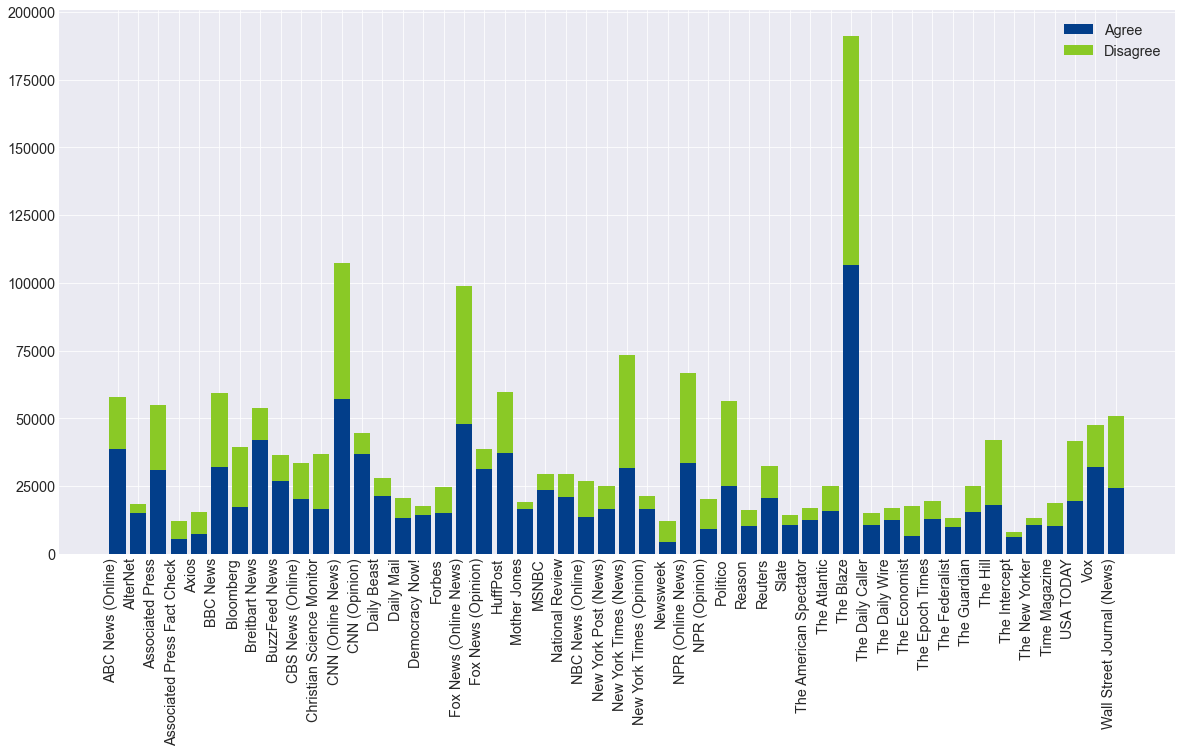

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(df.index, df['Agree Count'], color='#023e8a')
plt.bar(df.index, df['Disagree Count'], bottom=df['Agree Count'], color='#8ac926')
plt.set_ylabel = 'Total Count'
plt.xticks(rotation=90, ha='right',fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.legend(['Agree', 'Disagree'],fontsize='x-large')
plt.show()